In [2]:
'''
Author: Aadil Hussain
Built on: Python 3.10.11
'''

import pandas as pd

SPOTIFYDATA_FILEPATH = 'Assignment6_SpotifyTop100_Data.csv'

top100_data = pd.read_csv(SPOTIFYDATA_FILEPATH)

# the csv header is as such:
# title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type

# and the meaning of each header is as such:
# title is Song's Title
# artist is Song's artist
# genre is Genre of song
# year released is Year the song was released
# added is Day song was added to Spotify's Top Hits playlist
# bpm is Beats Per Minute - The tempo of the song
# nrgy is Energy - How energetic the song is
# dnce is Danceability - How easy it is to dance to the song
# dB is Decibel - How loud the song is
# live is How likely the song is a live recording
# val is How positive the mood of the song is
# dur is Duration of the song
# acous is How acoustic the song is
# spch is The more the song is focused on spoken word
# pop is Popularity of the song (not a ranking)
# top year is Year the song was a top hit
# artist type is Tells if artist is solo, duo, trio, or a band

In [3]:
# Please answer all questions by visualizing the data. Use ‘TOP YEAR’ for Comparisons.
    # 1. What is the top genre (most frequent occurrence) of each year : 2010 - 2019? OR: What are genre counts (most frequent occurrence) for year 2011?
    # 2. Which artist had the most songs on the Bilboard top 100 list for each year, how many did they have in that year?
    # 3. Did ‘DancePop’ increase or decrease in popularity from 2010-2019
    # 4. Is There a correlation between ‘bpm’ and ‘danceability’
    # 5. Did the ‘acousticness’ of songs increase or decrease from 2010-2019
    # 6. What is the ratio of Solo:Duo:Band in the year 2016
    # 7. Is there a relationship between dB and year?
    # 8. Is there a relationship between dB and genre? (use averages)
    # 9. In the year 2014, what is the genre breakdown? (ie. Number of songs in each genre)
    # 10. Is there a correlation between ‘energy’ and ‘acousticness’

In [4]:
top100_data

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='top genre'>

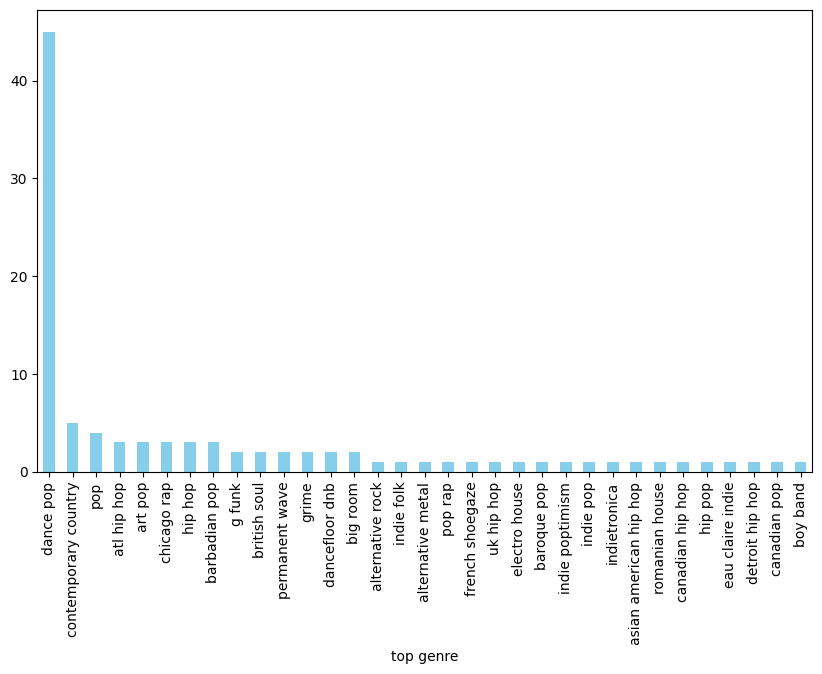

In [6]:
# 1 - What is the top genre (most frequent occurrence) of each year : 2010 - 2019? OR: What are genre counts (most frequent occurrence) for year 2011?

# Filter the data for the year 2011
data_2011 = top100_data[top100_data['top year'] == 2011]

# Use value_counts to get genre counts and ploot a bar chart
genre_counts_2011 = data_2011['top genre'].value_counts()
genre_counts_2011.plot(kind='bar', figsize=(10, 6), color='skyblue')

     top year          artist  song_count
42     2010.0         Rihanna           5
78     2011.0      Bruno Mars           3
155    2012.0   Calvin Harris           3
237    2013.0   Calvin Harris           4
302    2014.0   Ariana Grande           3
436    2015.0    Taylor Swift           4
451    2016.0           Adele           3
559    2017.0  Kendrick Lamar           4
623    2018.0           Drake           5
737    2019.0     Post Malone           5


<Axes: xlabel='top year'>

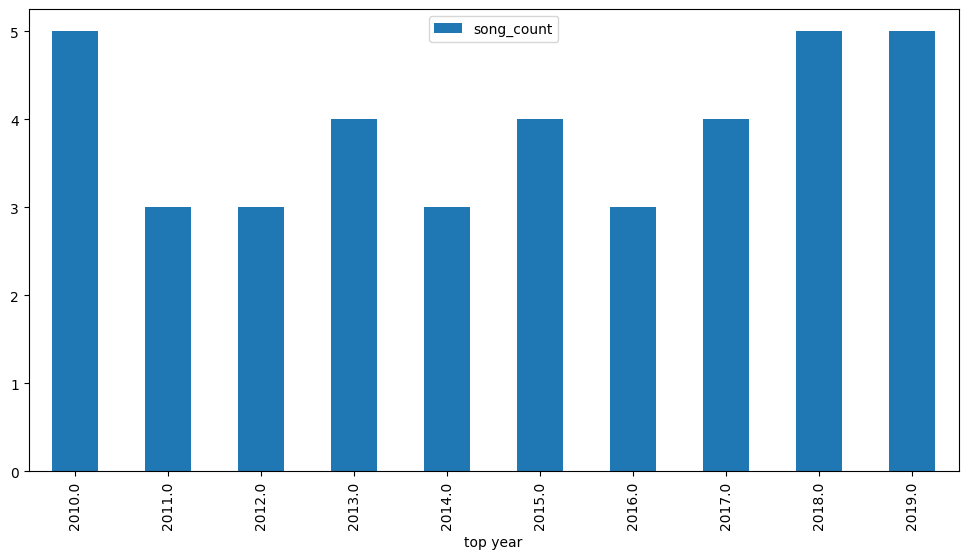

In [12]:
#2 - Which artist had the most songs on the Bilboard top 100 list for each year, how many did they have in that year?

# Group the data by 'top year' and 'artist'
artist_counts_by_year = top100_data.groupby(['top year', 'artist']).size().reset_index(name='song_count')

# Find the artist with the most songs for each year
artist_most_songs_by_year = artist_counts_by_year.loc[artist_counts_by_year.groupby('top year')['song_count'].idxmax()]

print(artist_most_songs_by_year)

# Ploot itt
artist_most_songs_by_year.plot(kind='bar', x='top year', y='song_count', figsize=(12, 6))
#how would i plot this to show me which artist had most songs on billboard per year and how many in that year?

<Axes: xlabel='year released'>

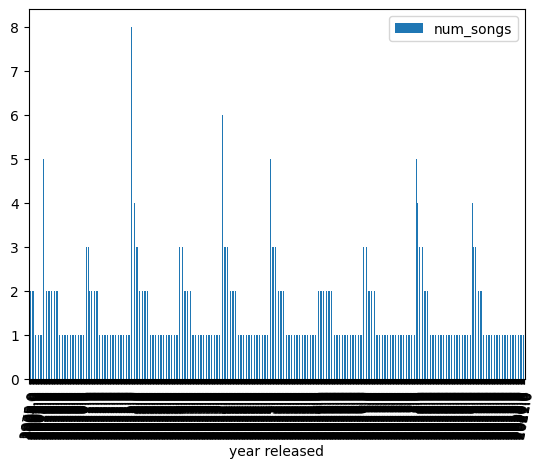

In [16]:
# alternative way of graphing it if you really wanted ALL the details... question 2 btw
df_grouped = top100_data.groupby(['year released', 'artist'])['title'].count().reset_index(name='num_songs')

# Sort the data by year and the number of songs in descending order
df_grouped = df_grouped.sort_values(by=['year released', 'num_songs'], ascending=[True, False])

df_grouped.plot(kind = 'bar', x = 'year released', y = 'num_songs', rot = 80)

<Axes: xlabel='top year'>

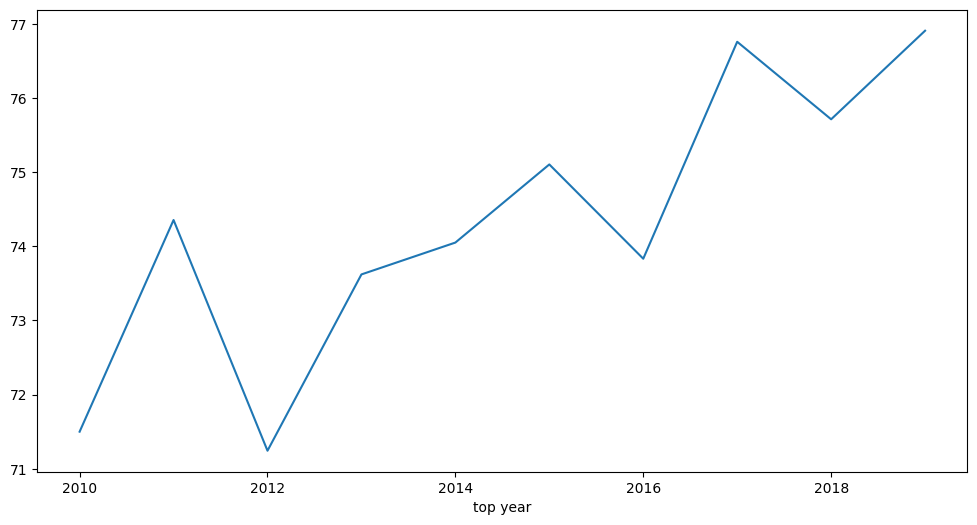

In [35]:
# 3 - Did ‘DancePop’ increase or decrease in popularity from 2010-2019

# Filter the data for the years 2010 to 2019 and 'dance pop' genre

dancepop_data = top100_data[(top100_data['top year'] >= 2010) & (top100_data['top year'] <= 2019) & (top100_data['top genre'] == 'dance pop')]

# Group the data by 'top year' and calculate the average popularity
avg_popularity_by_year = dancepop_data.groupby('top year')['pop'].mean()

# Plooting time
avg_popularity_by_year.plot(kind='line', figsize=(12, 6))
#yes, dancepop increased in popularity from 2010 to 2019

<Axes: xlabel='bpm', ylabel='dnce'>

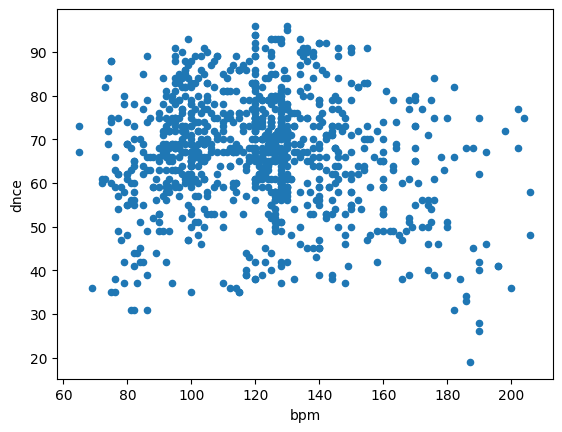

In [37]:
#4 - Is There a correlation between ‘bpm’ and ‘danceability’
top100_data.plot(kind='scatter', x = 'bpm', y = 'dnce')
# there is no correlation between bpm and danceability

<Axes: xlabel='year released', ylabel='acousticness'>

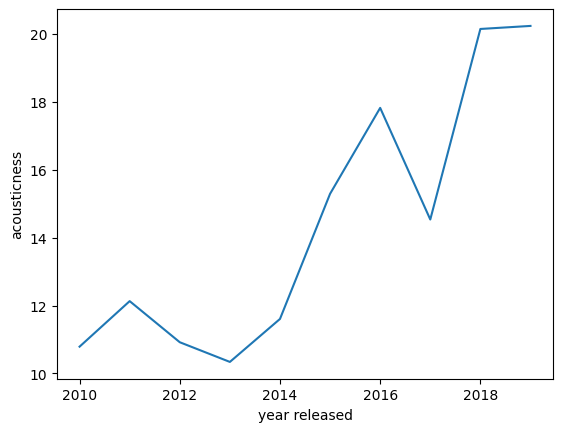

In [40]:
# 5 - Did the ‘acousticness’ of songs increase or decrease from 2010-2019
decade_data = top100_data[(top100_data['year released'] >= 2010) & (top100_data['year released'] <= 2019)]
# Calculate mean acousticness for each year in decade
mean_acousticness = decade_data.groupby('year released')['acous'].mean()
mean_acousticness.plot(ylabel = 'acousticness')
# acousticness increased between 2010 and 2019


<Axes: ylabel='count'>

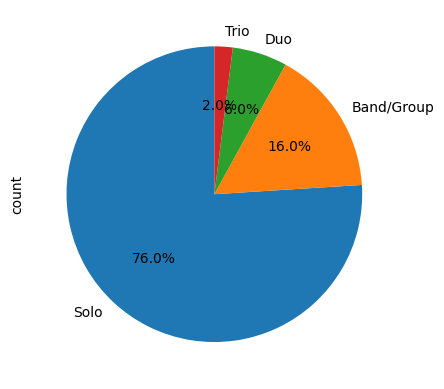

In [44]:
# 6 - What is the ratio of Solo:Duo:Band in the year 2016
# Filter the data for the year 2016
data_2016 = top100_data[top100_data['top year'] == 2016]

# Count the occurrences of each artist type
artist_type_counts = data_2016['artist type'].value_counts()

# lets make a pie
artist_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

<Axes: xlabel='dB', ylabel='top year'>

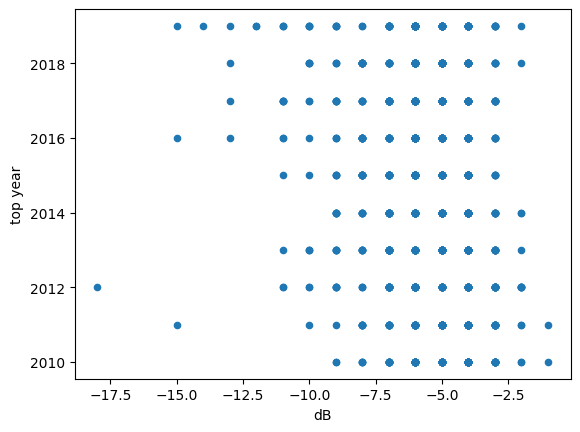

In [68]:
# 7 - Is there a relationship between dB and year?
top100_data.plot(kind = 'scatter', x = 'dB', y = 'top year')
# there seems to be no rel between dB and year

<Axes: xlabel='top genre', ylabel='dB'>

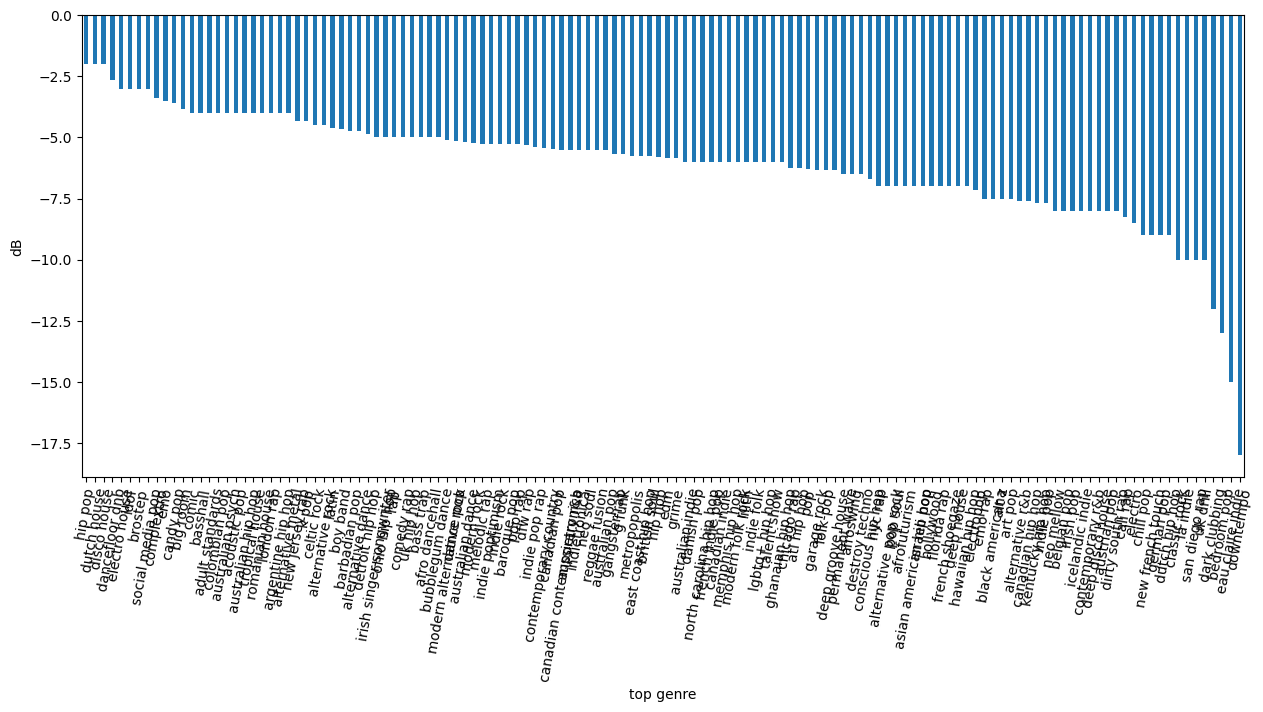

In [67]:
# 8 - Is there a relationship between dB and genre? (use averages)

# Group the data by 'genre' and calculate the average 'dB'
avg_db_by_genre = top100_data.groupby('top genre')['dB'].mean().sort_values(ascending=False)

avg_db_by_genre.plot(rot = 80, kind = 'bar', figsize=(15, 6), ylabel = 'dB')
#certain genres use a lower average dB on their songs

<Axes: xlabel='top genre'>

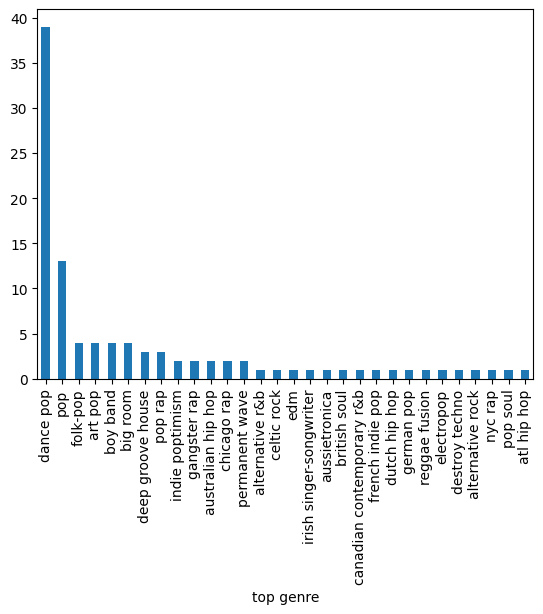

In [70]:
# 9 - In the year 2014, what is the genre breakdown? (ie. Number of songs in each genre)

# Filter the data for the year 2014
data_2014 = top100_data[top100_data['year released'] == 2014]

# Count the occurrences of each genre
genre_counts_2014 = data_2014['top genre'].value_counts()

genre_counts_2014.plot(kind = 'bar')

<Axes: xlabel='nrgy', ylabel='acous'>

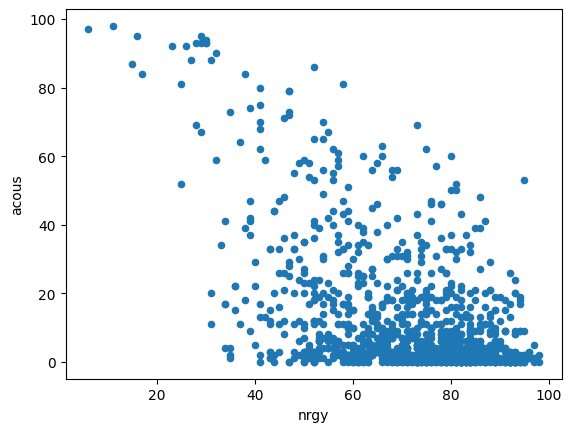

In [73]:
# 10 - Is there a correlation between ‘energy’ and ‘acousticness’
top100_data.plot(kind = 'scatter', x = 'nrgy', y = 'acous')
# it appears there is a downward/negative linear trend between energy and acousticness,
# as the energy gets higher, acoustic drops. 